In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

# 1.1

In [3]:
covid = pd.read_csv('/content/covid.csv')
print(covid)

      id     sex  birth_year  ... infected_by confirmed_date     state
0      1  female      1984.0  ...         NaN      1/20/2020  released
1      2    male      1964.0  ...         NaN      1/24/2020  released
2      3    male      1966.0  ...         NaN      1/26/2020  released
3      4    male      1964.0  ...         NaN      1/27/2020  released
4      5    male      1987.0  ...         NaN      1/30/2020  released
..   ...     ...         ...  ...         ...            ...       ...
171  172  female      1997.0  ...         NaN      2/24/2020  isolated
172  173    male      1949.0  ...         NaN      2/24/2020  deceased
173  174  female      1958.0  ...         NaN      2/24/2020  isolated
174  175    male      1997.0  ...         NaN      2/24/2020  isolated
175  176  female      1950.0  ...         NaN      2/24/2020  isolated

[176 rows x 9 columns]


# 1.2


In [9]:

print("number of data: ",covid.size)
print("coloumns: ")
for col in covid: 
    print(col) 

number of data:  1584
coloumns: 
id
sex
birth_year
country
region
infection_reason
infected_by
confirmed_date
state


 
 ‍
  داده ها مربوط به اطلاعات  افراد مبتلا به کوید می باشند
  ۱۷۶ سطر معادل ۱۷۶ نفر که راجع به آن ها اطلاعات جنسیت٫ سال تولد٬ کشور٬ دلیل ابتلا٬ عامل ابتلا٬ تارخ تأیید  ابتلا و وضعیت فعلی را داریم.
  

# 1.3


In [10]:
print('mean:', np.mean(covid['birth_year']))
print('max:', max(covid['birth_year']))
print('std:', np.std(covid['birth_year']))

mean: 1973.3855421686746
max: 2009.0
std: 16.981443682011555


# 1.4
برای از بین بردن null value از متد dropna() استفاده کردم.






In [12]:
if covid.isna().values.any():
  print("includes null values")
else:
  print("doesn't incluse null values")
no_na_covid = covid.dropna()
print("after removing null values: ")
print(no_na_covid)

includes null values
after removing null values: 
      id     sex  birth_year  ... infected_by confirmed_date     state
5      6    male      1964.0  ...         3.0      1/30/2020  released
8      9  female      1992.0  ...         5.0      1/31/2020  released
9     10  female      1966.0  ...         6.0      1/31/2020  released
10    11    male      1995.0  ...         6.0      1/31/2020  released
13    14  female      1980.0  ...        12.0       2/2/2020  released
14    15    male      1977.0  ...         4.0       2/2/2020  released
17    18  female      1999.0  ...        16.0       2/5/2020  released
19    20  female      1978.0  ...        15.0       2/5/2020  released
20    21  female      1960.0  ...         6.0       2/5/2020  released
21    22    male      1973.0  ...        16.0       2/6/2020  released
24    25  female      1946.0  ...        27.0       2/9/2020  isolated
25    26    male      1968.0  ...        27.0       2/9/2020  isolated
27    28  female      1989.

# 1.5

histogram of 'infected by'

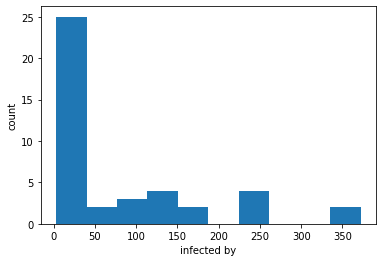

In [14]:
plt.hist(no_na_covid['infected_by'])
plt.xlabel('infected by')
plt.ylabel('count')
plt.show()

scatterplot of 'infected_by' and 'age'

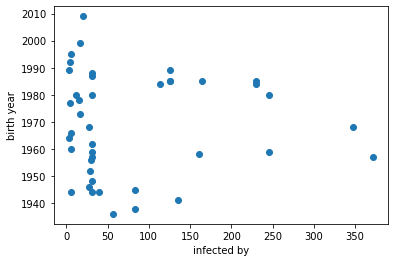

In [15]:
plt.scatter(no_na_covid['infected_by'],no_na_covid['birth_year'])
plt.xlabel('infected by')
plt.ylabel('birth year')
plt.show()

matrix plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 432x288 with 0 Axes>

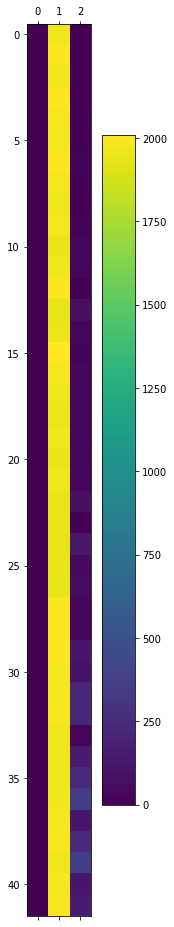

In [22]:
mat_df = no_na_covid[['sex','birth_year','infected_by']]
mat_df['sex'] = mat_df['sex'].apply(lambda x: int(x=='female'))
figure=plt.figure()
figure=plt.matshow(mat_df, interpolation = 'nearest')
plt.colorbar(figure)
plt.show()

# 1.6
با استفاده از z-score ٬ outlier ها را شناسایی می‌کنیم

if value < mean+treshhold*standard deviation or value>mean+treshhold*standard deviation , value is an outlier adnthat row shoud be removed
we assume that treshhold=3

برای حذف آوت لیرها از این شرط استفاده می‌کنیم
filtered_entries = (abs_z_scores < 3).all(axis=1)

In [48]:
#tmp=no_na_covid[['birth_year','infected_by']]
z_scores = scipy.stats.zscore(no_na_covid[['birth_year','infected_by']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
outlier=(abs_z_scores >= 3)
new_df = no_na_covid[filtered_entries]
print("outlier:")
print(no_na_covid[outlier])
print("after removing outliers:")
print(no_na_covid[filtered_entries])





outlier:
      id   sex  birth_year  ... infected_by confirmed_date     state
162  163  male      1957.0  ...       372.0      2/23/2020  isolated

[1 rows x 9 columns]
after removing outliers:
      id     sex  birth_year  ... infected_by confirmed_date     state
5      6    male      1964.0  ...         3.0      1/30/2020  released
8      9  female      1992.0  ...         5.0      1/31/2020  released
9     10  female      1966.0  ...         6.0      1/31/2020  released
10    11    male      1995.0  ...         6.0      1/31/2020  released
13    14  female      1980.0  ...        12.0       2/2/2020  released
14    15    male      1977.0  ...         4.0       2/2/2020  released
17    18  female      1999.0  ...        16.0       2/5/2020  released
19    20  female      1978.0  ...        15.0       2/5/2020  released
20    21  female      1960.0  ...         6.0       2/5/2020  released
21    22    male      1973.0  ...        16.0       2/6/2020  released
24    25  female      194

در این مجموعه آوت لیر داریم زیرا یک داده خرج از بازه میانگین +- ۳*انحراف معیار بوده.

#2
R2 and MAPE are good for knowing error/accuracy without comparison 
if R2 score=1 it means the prediction is accurate adn y_test=predicted_y
RMSD is the eRror rate it's good for comparison
MAPE < 10% is Excellent, MAPE < 20% is Good) 


In [61]:
student = pd.read_csv('/content/student.csv', sep=';')

#calculations on integer parts of data frame
int_data = student.loc[:, student.dtypes == np.int64]

x = int_data.iloc[:, 0:-1]
y = int_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

r = LinearRegression().fit(x_train, y_train)

predicted_y = [int(i) for i in predicted_y]

y_test = np.array(y_test)
predicted_y = r.predict(x_test)
#print(y_test)
#print(predicted_y)
print("R2 score =", round(sm.r2_score(y_test, predicted_y), 2))
sum=0
sum2=0
temp=0
for i in range(y_test.size):
 temp= y_test[i]-predicted_y[i]
 sum=sum+temp**2
 if y_test[i] != 0:
   sum2=sum2+temp/y_test[i]
print("RMSD: ",sum/y_test.size)
print("MAPE: ",sum2/y_test.size)



R2 score = 0.88
RMSD:  2.4267858057314817
MAPE:  0.0604279373675145
